# Урок 3. ПРОДВИНУТЫЙ PANDAS И ЗНАКОМСТВО С ВИЗУАЛИЗАЦИЕЙ НА PYTHON

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1

Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.  
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]  

Строка names уже задана.

In [2]:
names = 'Name1 Surname1, Name2 Surname2'

In [3]:
names_list = names.split(', ')
names_list

['Name1 Surname1', 'Name2 Surname2']

### 2

In [4]:
df = pd.DataFrame({'client_id': np.random.randint(1, 10000, 30),
                   'sex': np.random.choice([0, 1], 30),
                   'wealth': np.random.choice(['low', 'medium', 'high'], 30),
                   'age': np.random.randint(20, 70, 30)})

In [5]:
df.head()

,client_id,sex,wealth,age
0,9446,1,low,23
1,7589,1,medium,24
2,9396,1,low,52
3,1548,1,low,31
4,3330,1,low,48


Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную medium_35.

In [6]:
medium_35 = df.loc[(df.wealth == 'medium') & (df.age > 35)]
medium_35

,client_id,sex,wealth,age
6,4075,1,medium,53
7,5150,1,medium,47
12,3664,1,medium,50
15,2570,0,medium,44
20,6030,1,medium,45


### 3

Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий. Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

In [7]:
df = pd.DataFrame({'Клиент id': np.random.randint(1, 10000, 30),
                   'Пол': np.random.choice([0, 1], 30),
                   'Благосостояние': np.random.choice(['low', 'medium', 'high'], 30),
                   'Возраст': np.random.randint(20, 70, 30)})

In [8]:
rename_cols = {'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth', 'Возраст': 'age'}
df = df.rename(columns=rename_cols)
df.head()

,client_id,sex,wealth,age
0,6586,0,medium,59
1,9654,1,high,60
2,6450,0,high,44
3,8781,0,high,38
4,8626,0,medium,56


### 4

Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)

In [9]:
df['older_than_30'] = df.age > 30
df.head()

,client_id,sex,wealth,age,older_than_30
0,6586,0,medium,59,True
1,9654,1,high,60,True
2,6450,0,high,44,True
3,8781,0,high,38,True
4,8626,0,medium,56,True


### 5

А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.

In [10]:
unique_num = df.nunique()
unique_num

client_id        30
sex               2
wealth            3
age              21
older_than_30     2
dtype: int64

### 6

У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:

In [21]:
data = pd.DataFrame({'client_id': df.client_id.sample(10).values,
                     'amount': np.random.randint(1000, 100000, 10),
                     'date': np.random.randint(1585425000, 1585430000, 10)})
data.head()

,client_id,amount,date
0,8966,40877,1585429459
1,4360,70575,1585429122
2,648,10884,1585425236
3,8781,37268,1585427769
4,6450,32274,1585428853


Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)

Предыдущий датафрейм загружен в переменную df, новый – в data 

In [24]:
full_data = data.merge(df, on='client_id') 
full_data.head()

,client_id,amount,date,sex,wealth,age,older_than_30
0,8966,40877,1585429459,1,medium,62,True
1,4360,70575,1585429122,0,high,58,True
2,648,10884,1585425236,0,high,33,True
3,8781,37268,1585427769,0,high,38,True
4,6450,32274,1585428853,0,high,44,True


### 7

Теперь давайте создадим собственную функцию. Напишите функцию read_n_agg, которая:

· принимает на вход один параметр – путь к файлу  
· считывает переданный файл, в котором разделителем является ;  
· считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)  
· возвращает результат этих действий (агрегированный датафрэйм)

In [28]:
x = pd.read_csv('3_companies.csv', sep=';')
x

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02
...,...,...,...
288,Сэтл групп,6152279994,2004-03-30
289,ОАО «Горшков Чернов»,26623978007,2004-03-30
290,НПО «Фадеев»,84314056422,1998-09-03
291,Петролеум Трейдинг,95528839292,1975-01-31


In [49]:
path = '3_companies.csv'
def rean_n_agg(path):
    df = pd.read_csv(path, sep=';')
    return df.groupby('company').agg({'income': 'mean'}, as_index=True)

In [51]:
mean_income = rean_n_agg(path)
mean_income.head()

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10


### 8

Вернемся к данным по поездкам на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей.

· journey_id – уникальный id поездки  
· user_id – id пользователя  
· driver_id – id водителя  
· taxi_id – id машины  
· icon – тип поездки  
· start_type – тип заказа (asap, reserved, delayed)  
· start_at – время начала поездки    
· start_lat – исходное местоположение пользователя, широта  
· start_lon – исходное местоположение пользователя, долгота  
· end_at – время окончания поездки  
· end_lat – итоговое местоположение, широта  
· end_lon – итоговое местоположение, долгота  
· end_state – состояние заказа  
· driver_start_lat – исходное местоположение водителя, широта  
· driver_start_lon – исходное местоположение водителя, долгота  
· arrived_at – время прибытия водителя  
· source – платформа, с которой сделан заказ  
· driver_score – оценка водителя клиентом  
· rider_score – оценка клиента водителем  

Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file.   
Загрузите датасет, используя ; в качестве разделителя.   

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).  
Результат запишите в переменную taxi.

In [52]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [62]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [53]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


### 9

Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [70]:
np.round(taxi.source.value_counts(normalize=True).mul(100))

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

### 10

Чтобы показать разницу более наглядно, попробуем визуализировать показатели.  

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество   заказов (абсолютные значения).  

Какой график получился?

In [86]:
orders = taxi.source.value_counts().reset_index().rename(columns={'index': 'platform', 'source': 'count'})
orders

,platform,count
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


<AxesSubplot:xlabel='platform', ylabel='count'>

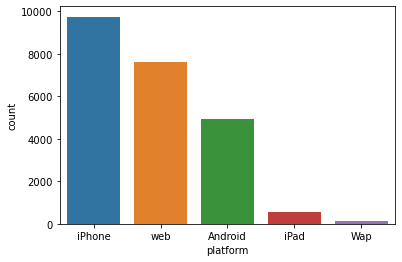

In [88]:
sns.barplot(x='platform', y='count', data=orders)

C:\Users\DNS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source', ylabel='count'>

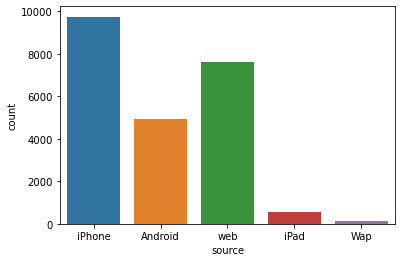

In [89]:
sns.countplot(taxi.source)

### 11

Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.

sns.countplot(taxi['source'])

Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

C:\Users\DNS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icon', ylabel='count'>

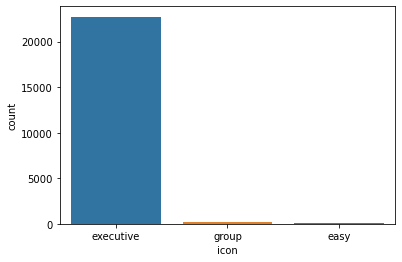

In [82]:
sns.countplot(taxi.icon)

### 12

Теперь попробуем построить более сложный график!

С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.

· __Больше всего заказов со статусом drop off совершено с платформы iPhone__  
· __На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone__  
· На web отмененных поездок (rider cancel) меньше, чем на Android  
· __Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone__  
· Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы Android  

<AxesSubplot:xlabel='source', ylabel='count'>

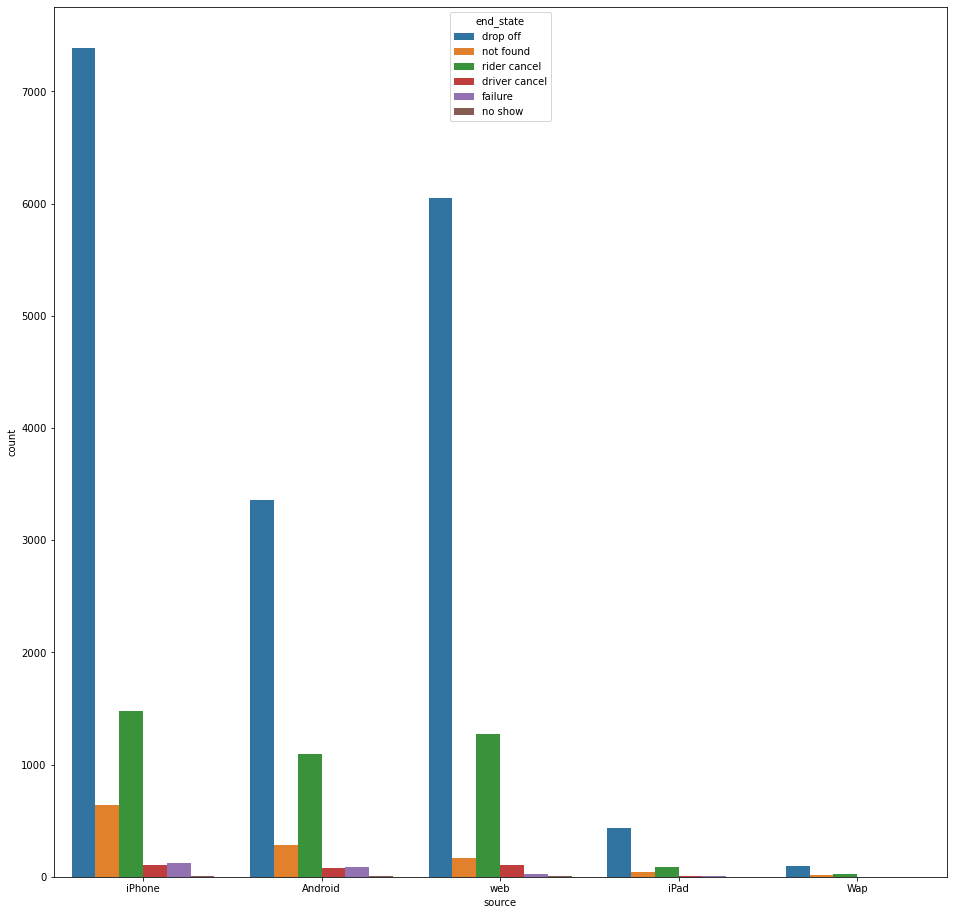

In [96]:
plt.figure(figsize=(16, 16))
sns.countplot(data=taxi, hue='end_state', x='source')

### 13

Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

1. Посчитайте частоту встречаемости каждой из оценок
2. Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
3. Сбросьте индексы
4. Переименуйте колонки в driver_score и percentage
5. Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
6. Запишите результат в driver_score_counts

In [110]:
driver_score_counts = taxi.driver_score.value_counts(normalize=True) \
                          .mul(100).round(2) \
                          .reset_index() \
                          .rename(columns={'index': 'driver_score',
                                           'driver_score': 'percantage'}) \
                          .sort_values('driver_score')
driver_score_counts

,driver_score,percantage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


### 14

Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

ax = sns.barplot(x=driver_score, y=percantage, data=driver_score_counts, color='blue', alpha=0.5)  
ax.set(xlabel='Driver score', ylabel='Percantage')  
sns.despine()  
plt.show()

In [108]:
ax = sns.barplot(x=driver_score, y=percantage, data=driver_score_counts, color='blue', alpha=0.5)  
ax.set(xlabel='Driver score', ylabel='Percantage')  
sns.despine()  
plt.show()

NameError: name 'driver_score' is not defined

Переменные driver_score и percantage нами не были заданы, корректная записать будет выглядеть так:

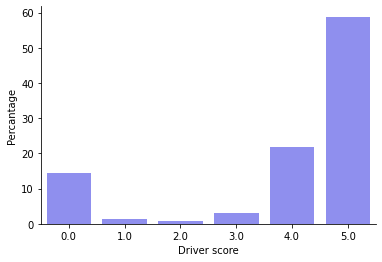

In [111]:
ax = sns.barplot(x='driver_score', y='percantage', data=driver_score_counts, color='blue', alpha=0.5)  
ax.set(xlabel='Driver score', ylabel='Percantage')  
sns.despine()  
plt.show()

### 15

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.  
В чем его отличие от распределения оценок водителей?

· __Более чем в 80% случаев водители поставили клиентам 5 звездочек__  
· __Водители ставят меньше 0, чем клиенты__  
· Водители ставят больше 0, чем клиенты  
· Более 20% оценок составляют 4

In [113]:
rider_score_counts = taxi.rider_score.value_counts(normalize=True) \
                          .mul(100).round(2) \
                          .reset_index() \
                          .rename(columns={'index': 'rider_score',
                                           'rider_score': 'percantage'}) \
                          .sort_values('rider_score')
rider_score_counts

,rider_score,percantage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


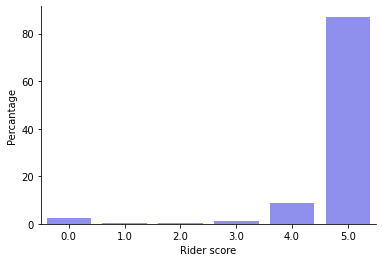

In [114]:
ax = sns.barplot(x='rider_score', y='percantage', data=rider_score_counts, color='blue', alpha=0.5)  
ax.set(xlabel='Rider score', ylabel='Percantage')  
sns.despine()  
plt.show()